# Example: Load and display data

In [26]:
import matplotlib.pyplot as plt
from gsd_pipeline import data_loader as dl
from gsprep.visual_tools.visual import display, idisplay
from gsprep.visual_tools.dataset_histograms import plot_dataset_histogram

Declare paths

In [27]:
data_dir = '/Users/julian/stroke_research/data/all_2017_2016'
dataset_file = 'data_set.npz'

Load data
- the data format is (n_subj, n_x, n_y, n_z, n_c)
- in the acute setting, the available data is ct_inputs, brain_masks +/- clinical_inputs
- ct_lesion_gt, mri_inputs, mri_lesion_gt are obtained later on


In [28]:
(clinical_inputs, ct_inputs, ct_lesion_GT, mri_inputs, mri_lesion_GT, brain_masks, ids, params) = dl.load_saved_data(data_dir, filename=dataset_file)  
print(ct_inputs.shape)
print(ct_lesion_GT.shape)
print(brain_masks.shape)
print(len(ids))


Loading a total of 144 subjects.
Sequences used: {'ct_sequences': ['wcoreg_Tmax', 'wcoreg_CBF', 'wcoreg_MTT', 'wcoreg_CBV'], 'mri_sequences': ['masked_wcoreg_VOI']}
0 subjects had been excluded.
(144, 79, 95, 79, 4)
(144, 79, 95, 79)
(144, 79, 95, 79)
144


Display 3D images

In [ ]:
n_subj, n_x, n_y, n_z, n_c = ct_inputs.shape
subj = 1
for channel in range(n_c):
    display(ct_inputs[subj, ..., channel], mask=ct_lesion_GT[subj])
display(brain_masks[subj])
display(ct_lesion_GT[subj])


#### Interactive display


In [ ]:
idisplay(ct_inputs[subj, ..., 0], mask=ct_lesion_GT[subj])


### Display dataset histogram

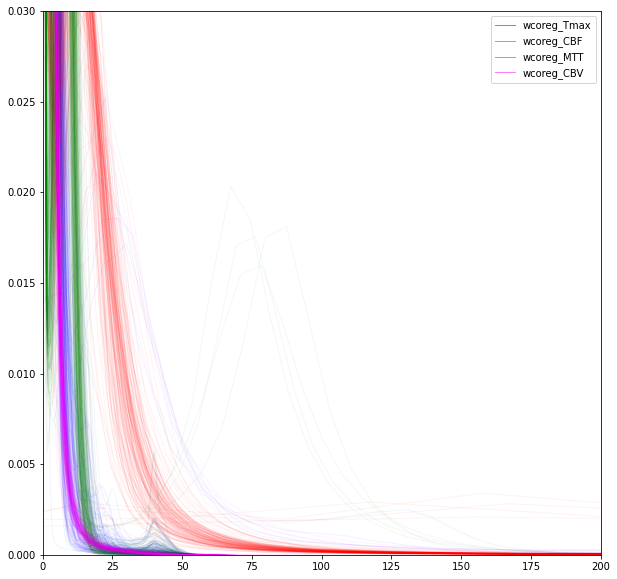

In [55]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)
n_subj, n_x, n_y, n_z, n_c = ct_inputs.shape
color_scheme = ['blue', 'red', 'green', 'magenta']
ct_sequences = params.item()['ct_sequences']

for index, (channel, color, label) in enumerate(zip(range(n_c), color_scheme, ct_sequences)):
    plot_dataset_histogram(ct_inputs[:, ..., channel], num_positions=100, color=color, mask_zero=True, axis=axis,
                           dataset_label=label)
axis.set_xlim(0, 200)
axis.set_ylim(0, 0.03)
leg = axis.legend()
for lh in leg.legendHandles:
    lh.set_alpha(0.5)

